In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import re
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
warnings.filterwarnings("ignore")

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
df_train = pd.read_csv("train.csv")
df_test = pd.read_csv("test.csv")
df_train

id                                       comment_text  \
0       0000997932d777bf  Explanation\nWhy the edits made under my usern...   
1       000103f0d9cfb60f  D'aww! He matches this background colour I'm s...   
2       000113f07ec002fd  Hey man, I'm really not trying to edit war. It...   
3       0001b41b1c6bb37e  "\nMore\nI can't make any real suggestions on ...   
4       0001d958c54c6e35  You, sir, are my hero. Any chance you remember...   
...                  ...                                                ...   
159566  ffe987279560d7ff  ":::::And for the second time of asking, when ...   
159567  ffea4adeee384e90  You should be ashamed of yourself \n\nThat is ...   
159568  ffee36eab5c267c9  Spitzer \n\nUmm, theres no actual article for ...   
159569  fff125370e4aaaf3  And it looks like it was actually you who put ...   
159570  fff46fc426af1f9a  "\nAnd ... I really don't think you understand...   

        malignant  highly_malignant  rude  threat  abuse  loathe  
0               0                 0     0       0      0       0  
1               0                 0     0       0      0       0  
2               0                 0     0       0      0       0  
3               0                 0     0       0      0       0  
4               0                 0     0       0      0       0  
...           ...               ...   ...     ...    ...     ...  
159566          0                 0     0       0      0       0  
159567          0                 0     0       0      0       0  
159568          0                 0     0       0      0       0  
159569          0                 0     0       0      0       0  
159570          0                 0     0       0      0       0  

[159571 rows x 8 columns]

In [ ]:
df_train.columns

Index(['id', 'comment_text', 'malignant', 'highly_malignant', 'rude', 'threat',
       'abuse', 'loathe'],
      dtype='object')

In [ ]:
df_train.dtypes

id                  object
comment_text        object
malignant            int64
highly_malignant     int64
rude                 int64
threat               int64
abuse                int64
loathe               int64
dtype: object

In [ ]:
df_train.isnull().sum()

id                  0
comment_text        0
malignant           0
highly_malignant    0
rude                0
threat              0
abuse               0
loathe              0
dtype: int64

### DATA PREPROCESSING

In [ ]:
contractions = { 
"ain't": "am not",
"aren't": "are not",
"can't": "cannot",
"can't've": "cannot have",
"'cause": "because",
"could've": "could have",
"couldn't": "could not",
"couldn't've": "could not have",
"didn't": "did not",
"doesn't": "does not",
"don't": "do not",
"hadn't": "had not",
"hadn't've": "had not have",
"hasn't": "has not",
"haven't": "have not",
"he'd": "he would",
"he'd've": "he would have",
"he'll": "he will",
"he's": "he is",
"how'd": "how did",
"how'll": "how will",
"how's": "how is",
"i'd": "i would",
"i'll": "i will",
"i'm": "i am",
"i've": "i have",
"isn't": "is not",
"it'd": "it would",
"it'll": "it will",
"it's": "it is",
"let's": "let us",
"ma'am": "madam",
"mayn't": "may not",
"might've": "might have",
"mightn't": "might not",
"must've": "must have",
"mustn't": "must not",
"needn't": "need not",
"oughtn't": "ought not",
"shan't": "shall not",
"sha'n't": "shall not",
"she'd": "she would",
"she'll": "she will",
"she's": "she is",
"should've": "should have",
"shouldn't": "should not",
"that'd": "that would",
"that's": "that is",
"there'd": "there had",
"there's": "there is",
"they'd": "they would",
"they'll": "they will",
"they're": "they are",
"they've": "they have",
"wasn't": "was not",
"we'd": "we would",
"we'll": "we will",
"we're": "we are",
"we've": "we have",
"weren't": "were not",
"what'll": "what will",
"what're": "what are",
"what's": "what is",
"what've": "what have",
"where'd": "where did",
"where's": "where is",
"who'll": "who will",
"who's": "who is",
"won't": "will not",
"wouldn't": "would not",
"you'd": "you would",
"you'll": "you will",
"you're": "you are"
}

In [ ]:
def remove_contractions(text):
    
    # Convert words to lower case
    text = text.lower()
    
    # Replace contractions with their longer forms 
    if True:
        text = text.split()
        new_text = []
        for word in text:
            if word in contractions:
                new_text.append(contractions[word])
            else:
                new_text.append(word)
        text = " ".join(new_text)   
    

    return text

In [ ]:
def remove_chars(text):
     # Format words and remove unwanted characters
    text = re.sub(r'https?:\/\/.*[\r\n]*', ' ', text,flags=re.MULTILINE)
    text = re.sub(r'\<a href', ' ', text)
    text = re.sub(r'&amp;', ' ', text) 
    text = re.sub(r'[_"\-;%()|+&=*%.,!?:#$@\[\]/]', ' ', text)
    text = re.sub(r'<br />', ' ', text)
    text = re.sub(r'\'', ' ', text)
    text = re.sub(r'[0-9]', '', text)
    text = text.strip()
    
    return text

In [ ]:
def remove_stopwords(text):
    # Remove stop words
    text = text.split()
    text = [w for w in text if not w in stops]
    text = " ".join(text)
    
    return text

In [ ]:
def lemmatization(text):
    # Lemmatization
    lema = WordNetLemmatizer()
    text = text.split()
    text = [lema.lemmatize(w) for w in text]
    text = " ".join(text)
    
    return text

In [ ]:
df_train['comment_text'] = df_train['comment_text'].apply(remove_contractions)
print("Contractions expanded.")
df_train

Contractions expanded.


id  ... loathe
0       0000997932d777bf  ...      0
1       000103f0d9cfb60f  ...      0
2       000113f07ec002fd  ...      0
3       0001b41b1c6bb37e  ...      0
4       0001d958c54c6e35  ...      0
...                  ...  ...    ...
159566  ffe987279560d7ff  ...      0
159567  ffea4adeee384e90  ...      0
159568  ffee36eab5c267c9  ...      0
159569  fff125370e4aaaf3  ...      0
159570  fff46fc426af1f9a  ...      0

[159571 rows x 8 columns]

In [ ]:
df_train['comment_text'] = df_train['comment_text'].apply(remove_chars)
print("Unwanted Characters Removed.")
df_train

Unwanted Characters Removed.


id  ... loathe
0       0000997932d777bf  ...      0
1       000103f0d9cfb60f  ...      0
2       000113f07ec002fd  ...      0
3       0001b41b1c6bb37e  ...      0
4       0001d958c54c6e35  ...      0
...                  ...  ...    ...
159566  ffe987279560d7ff  ...      0
159567  ffea4adeee384e90  ...      0
159568  ffee36eab5c267c9  ...      0
159569  fff125370e4aaaf3  ...      0
159570  fff46fc426af1f9a  ...      0

[159571 rows x 8 columns]

In [ ]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [ ]:
stops = set(stopwords.words('english')+['u' , 'umm' , 'ur' , '4' , '2' , 'dey' , 'im' , 'wat' , 'der'])
df_train['comment_text'] = df_train['comment_text'].apply(remove_stopwords)
print("Stopwords Removed.")
df_train

Stopwords Removed.


id  ... loathe
0       0000997932d777bf  ...      0
1       000103f0d9cfb60f  ...      0
2       000113f07ec002fd  ...      0
3       0001b41b1c6bb37e  ...      0
4       0001d958c54c6e35  ...      0
...                  ...  ...    ...
159566  ffe987279560d7ff  ...      0
159567  ffea4adeee384e90  ...      0
159568  ffee36eab5c267c9  ...      0
159569  fff125370e4aaaf3  ...      0
159570  fff46fc426af1f9a  ...      0

[159571 rows x 8 columns]

In [ ]:
dictionary = {}

In [ ]:
def add_dict(text):
    # Adding words to dictionary
    text = text.split()
    for word in text:
        if word in dictionary:
            dictionary[word]+=1
        else:
            dictionary[word]=1

In [ ]:
df_train['comment_text'].apply(add_dict)
print("Dictionary Complete.")
df_train

Dictionary Complete.


id  ... loathe
0       0000997932d777bf  ...      0
1       000103f0d9cfb60f  ...      0
2       000113f07ec002fd  ...      0
3       0001b41b1c6bb37e  ...      0
4       0001d958c54c6e35  ...      0
...                  ...  ...    ...
159566  ffe987279560d7ff  ...      0
159567  ffea4adeee384e90  ...      0
159568  ffee36eab5c267c9  ...      0
159569  fff125370e4aaaf3  ...      0
159570  fff46fc426af1f9a  ...      0

[159571 rows x 8 columns]

In [ ]:
len(dictionary)

170820

##### We Can get the count of words with frequencies more than the threshold. This can be used to set the 'max_features' parameter


In [ ]:
count = 0
threshold = 15
feature_count = 0
delete = []
for word, count in dictionary.items():
    if count > threshold:
      feature_count+=1
    else:
      delete.append(word)
feature_count

18822

In [ ]:
for i in delete:
  dictionary.pop(i)
len(dictionary)

18822

In [ ]:
print(sorted(dictionary.items(), key = lambda kv:(kv[1], kv[0]), reverse=True)) 

[('article', 56176), ('page', 45320), ('wikipedia', 44684), ('talk', 35923), ('would', 35038), ('please', 29155), ('one', 28288), ('like', 27350), ('see', 20826), ('also', 19789), ('think', 19705), ('know', 18688), ('edit', 17957), ('people', 17879), ('articles', 16353), ('use', 16147), ('time', 15428), ('may', 15174), ('user', 13746), ('thanks', 13627), ('get', 13112), ('even', 13042), ('make', 12640), ('good', 12544), ('could', 12467), ('well', 12108), ('information', 11685), ('deletion', 11377), ('want', 11368), ('way', 10974), ('sources', 10966), ('name', 10908), ('image', 10890), ('wp', 10690), ('first', 10645), ('pages', 10510), ('help', 10458), ('new', 10274), ('editing', 10182), ('go', 10108), ('fuck', 10052), ('need', 9994), ('source', 9906), ('say', 9869), ('section', 9849), ('edits', 9786), ('thank', 9651), ('made', 9413), ('many', 9236), ('much', 9224), ('really', 9037), ('discussion', 8952), ('deleted', 8944), ('used', 8860), ('find', 8724), ('work', 8569), ('since', 8420)

In [ ]:
df_train['Length'] = df_train.apply( lambda row : len(row['comment_text']) ,axis=1)
df_train

id  ... Length
0       0000997932d777bf  ...    158
1       000103f0d9cfb60f  ...     69
2       000113f07ec002fd  ...    141
3       0001b41b1c6bb37e  ...    381
4       0001d958c54c6e35  ...     29
...                  ...  ...    ...
159566  ffe987279560d7ff  ...    188
159567  ffea4adeee384e90  ...     36
159568  ffee36eab5c267c9  ...     62
159569  fff125370e4aaaf3  ...     57
159570  fff46fc426af1f9a  ...    110

[159571 rows x 9 columns]

### EDA

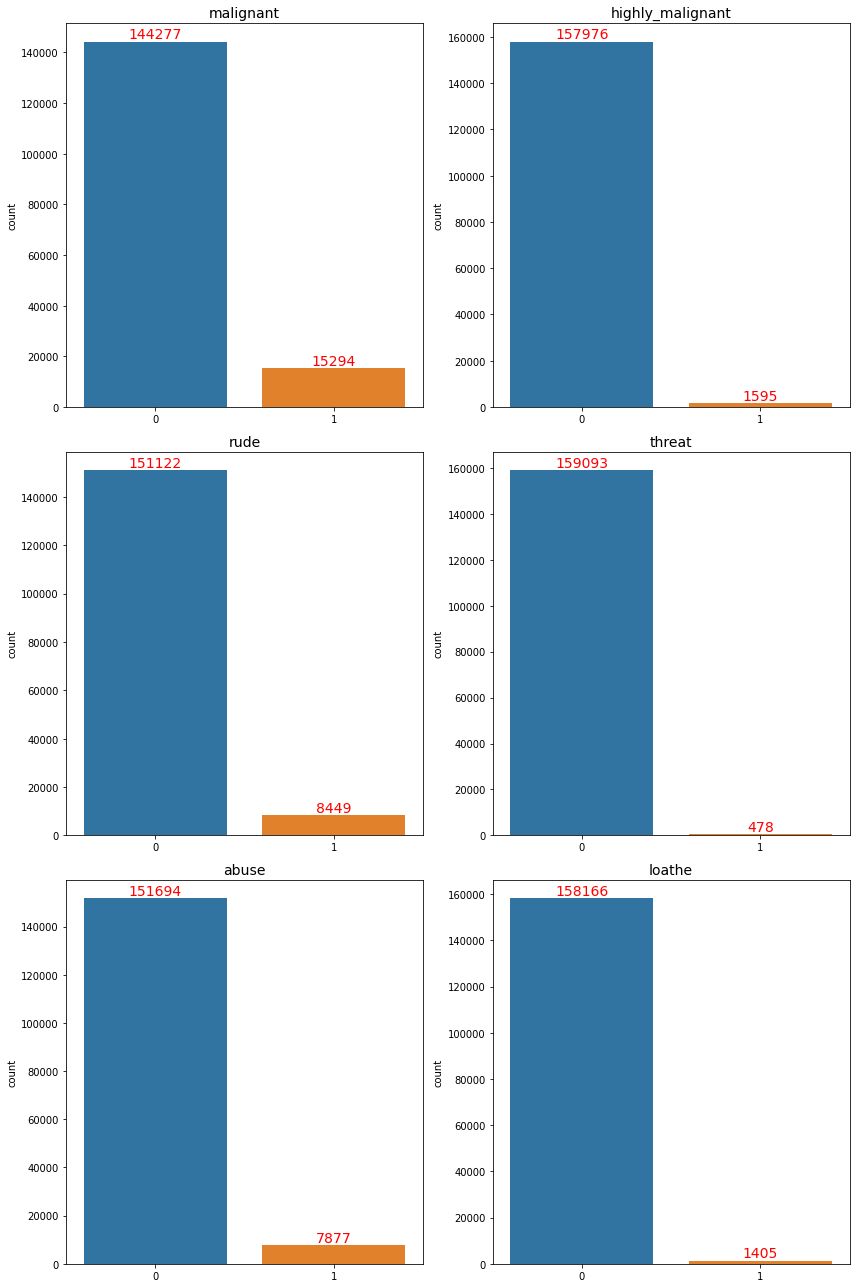

In [ ]:
plt.figure(figsize=(12,18))
j=1
for i in ['malignant', 'highly_malignant', 'rude', 'threat', 'abuse', 'loathe']:
    plt.subplot(3,2,j)
    j=j+1
    ax = sns.countplot(df_train[i])
    ax.set_title(i, fontsize=14)
    ax.set_xlabel('')
    for p in ax.patches:
        ax.text(p.get_x() + p.get_width()/2., p.get_height(), '%d' % int(p.get_height()), fontsize=14, color='red', ha='center', va='bottom')
plt.tight_layout()

In [ ]:
df_0 = df_train[(df_train['malignant']==0) & (df_train['highly_malignant']==0) & (df_train['rude']==0) & (df_train['threat']==0) & (df_train['abuse']==0) & (df_train['loathe']==0)].reset_index(drop=True)
df_1 = df_train[~(df_train['malignant']==0) & (df_train['highly_malignant']==0) & (df_train['rude']==0) & (df_train['threat']==0) & (df_train['abuse']==0) & (df_train['loathe']==0)].reset_index(drop=True)

In [ ]:
split_0 = int(len(df_0)/4)
split_1 = int(len(df_1)/4)
print(split_0, split_1)

35836 1416


In [ ]:
df_a = pd.concat([df_0.loc[split_0*0:split_0*1,:], df_1.loc[split_1*0:split_1*1,:]]).reset_index(drop=True)
df_b = pd.concat([df_0.loc[split_0*1:split_0*2,:], df_1.loc[split_1*1:split_1*2,:]]).reset_index(drop=True)
df_c = pd.concat([df_0.loc[split_0*2:split_0*3,:], df_1.loc[split_1*2:split_1*3,:]]).reset_index(drop=True)
df_d = pd.concat([df_0.loc[split_0*3:split_0*4,:], df_1.loc[split_1*3:split_1*4,:]]).reset_index(drop=True)

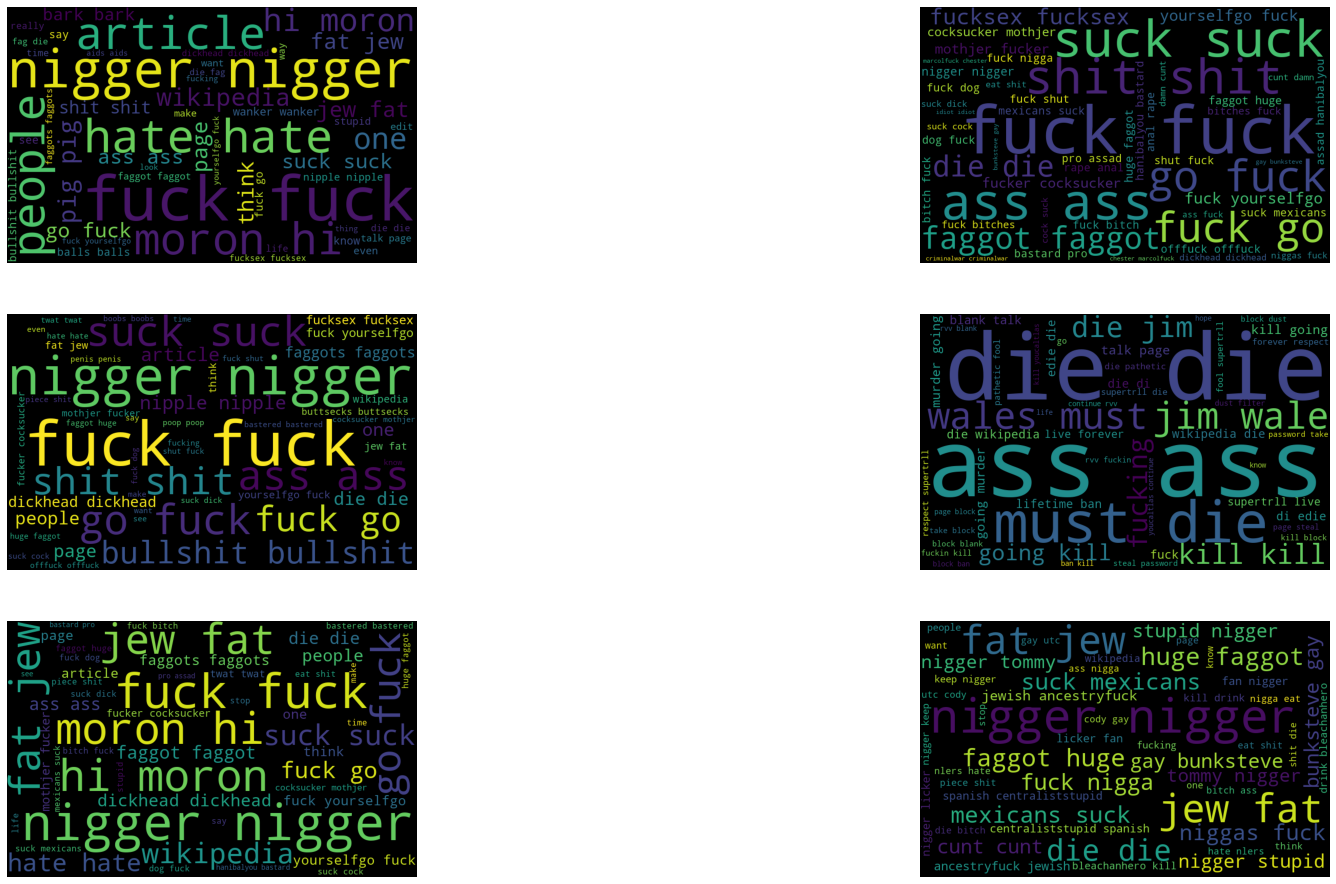

In [ ]:
from wordcloud import WordCloud
j=1
plt.figure(figsize=(30,16))
for i in ['malignant', 'highly_malignant', 'rude', 'threat', 'abuse', 'loathe']:
  plt.subplot(3,2,j)
  j=j+1
  hams = df_train['comment_text'][df_train[i]==1]
  spam_cloud = WordCloud(width=800,height=500,max_words=50).generate(' '.join(hams))
  plt.imshow(spam_cloud)
  plt.axis('off')
  # plt.tight_layout(pad=0)
plt.show()

In [ ]:
print(df_0['Length'].mean(),df_1['Length'].mean())

243.28721415316787 203.9504059301094


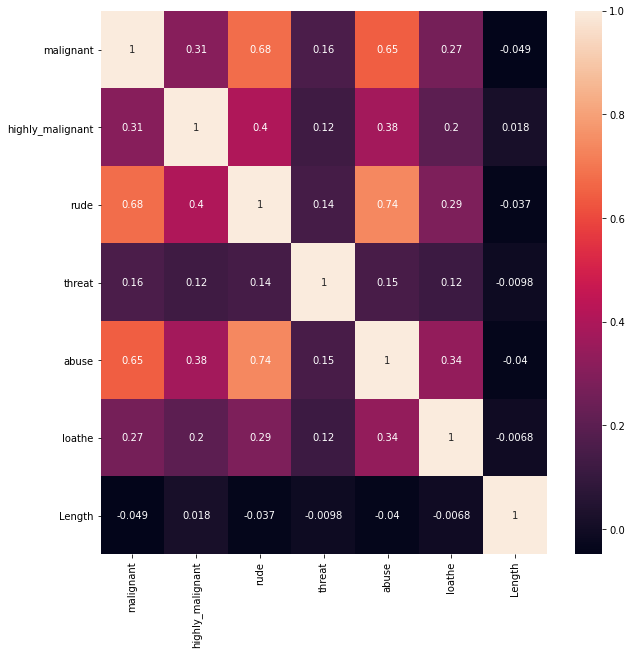

In [ ]:
plt.figure(figsize=(10,10))
sns.heatmap(df_train[['malignant', 'highly_malignant', 'rude', 'threat', 'abuse', 'loathe', 'Length']].corr(), annot=True)

In [ ]:
for i in ['malignant', 'highly_malignant', 'rude', 'threat', 'abuse', 'loathe']:
    print(df_train[[i,'Length']].groupby(i).mean())

               Length
malignant            
0          243.357528
1          181.999673
                      Length
highly_malignant            
0                 236.806597
1                 303.848276
         Length
rude           
0     240.75496
1     178.84081
            Length
threat            
0       237.676328
1       171.039749
           Length
abuse            
0      240.810395
1      173.277263
            Length
loathe            
0       237.714446
1       210.714591


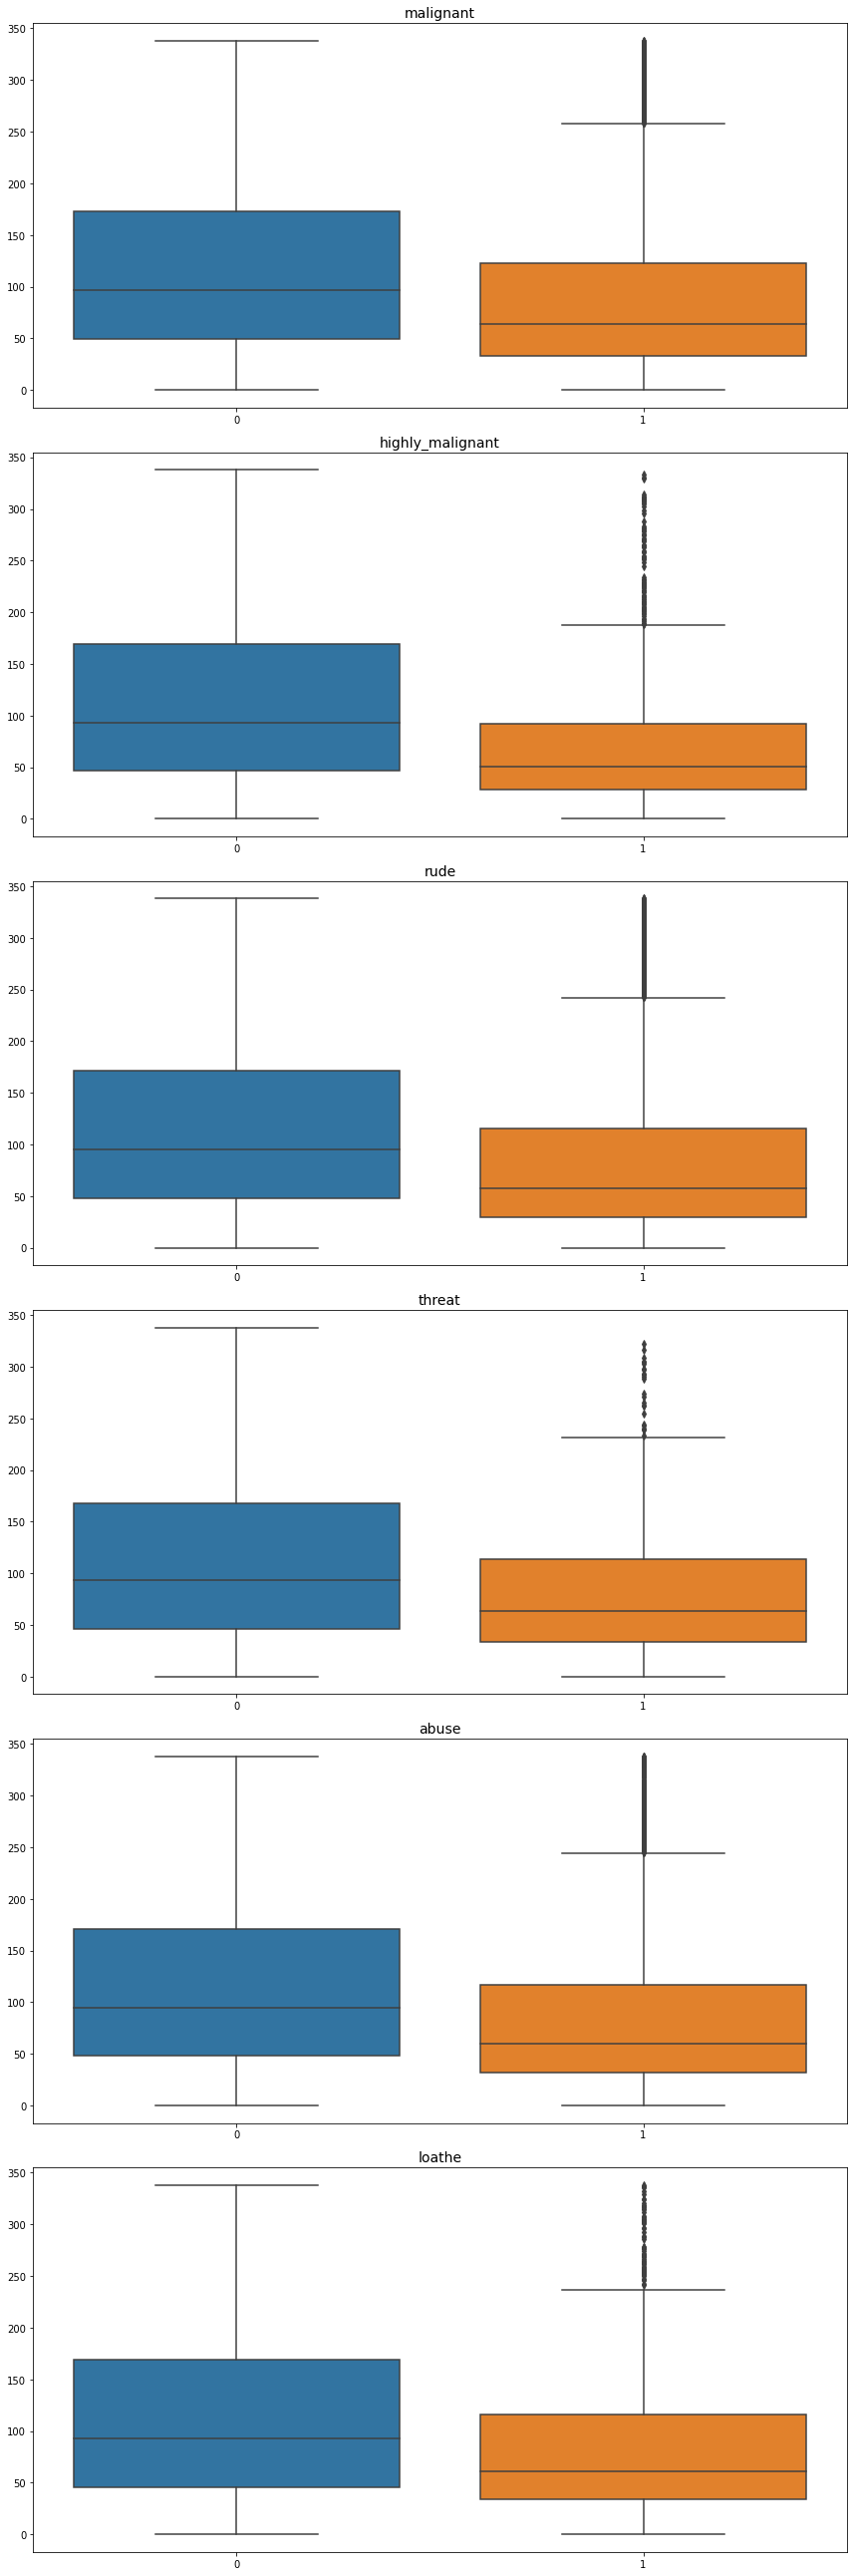

In [ ]:
plt.figure(figsize=(12,36))
j=1
df_temp = df_train.sort_values(by=['Length'])
for i in ['malignant', 'highly_malignant', 'rude', 'threat', 'abuse', 'loathe']:
    plt.subplot(6,1,j)
    j=j+1
    df_temp = df_train.sort_values(by=['Length']).reset_index(drop=True)
    ax = sns.boxplot(x = list(df_temp.loc[:130000,i]), y = list(df_temp.loc[:130000,"Length"]))
    ax.set_title(i, fontsize=14)
    ax.set_xlabel('')
plt.tight_layout()

In [ ]:
def emr(y_true, y_pred):
  n = len(y_true)
  row_indicators = np.all(y_true == y_pred, axis = 1) # axis = 1 will check for equality along rows.
  exact_match_count = np.sum(row_indicators)
  return exact_match_count/n

def hamming_loss(y_true, y_pred):
  hl_num = np.sum(np.logical_xor(y_true, y_pred))
  hl_den = np.prod(y_true.shape)
  return hl_num/hl_den

def label_based_micro_accuracy(y_true, y_pred):
  l_acc_num = np.sum(np.logical_and(y_true, y_pred))
  l_acc_den = np.sum(np.logical_or(y_true, y_pred))
  return l_acc_num/l_acc_den

def label_based_micro_precision(y_true, y_pred):
  l_prec_num = np.sum(np.logical_and(y_true, y_pred))
  l_prec_den = np.sum(y_pred)
  return l_prec_num/l_prec_den

def label_based_micro_recall(y_true, y_pred):
  l_recall_num = np.sum(np.logical_and(y_true, y_pred))
  l_recall_den = np.sum(y_true)
  return l_recall_num/l_recall_den

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf_vect_ngram = TfidfVectorizer(ngram_range=(1,2), analyzer='word', max_features=15000) # Initializing the Tfidf vectorizer with maximum of 23000 features and with ngram range of (1,3)
tfidf_vect_ngram.fit(df_train['comment_text'])

TfidfVectorizer(analyzer='word', binary=False, decode_error='strict',
                dtype=<class 'numpy.float64'>, encoding='utf-8',
                input='content', lowercase=True, max_df=1.0, max_features=15000,
                min_df=1, ngram_range=(1, 2), norm='l2', preprocessor=None,
                smooth_idf=True, stop_words=None, strip_accents=None,
                sublinear_tf=False, token_pattern='(?u)\\b\\w\\w+\\b',
                tokenizer=None, use_idf=True, vocabulary=None)

In [ ]:
!pip install scikit-multilearn

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

from skmultilearn.problem_transform import BinaryRelevance
from skmultilearn.problem_transform import ClassifierChain
from skmultilearn.problem_transform import LabelPowerset

# Initializing the models and their parameters
models = {
    "GaussianNB" : {'model':GaussianNB(),
                    },
    
    "MultinomialNB" : {'model':MultinomialNB(),
                      },
}

### MODEL_1 BUILDING 

In [ ]:
from sklearn.model_selection import train_test_split
x = df_a['comment_text']
y = df_a[['malignant', 'highly_malignant', 'rude', 'threat', 'abuse', 'loathe']]
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=42)

In [ ]:
x_train =  tfidf_vect_ngram.transform(x_train)
x_test =  tfidf_vect_ngram.transform(x_test)

In [ ]:
# Checking for the best model based on accuracy score
max_scr = 0

for i,j in models.items():
    classifier = BinaryRelevance(j['model'])
    best_model_scr = 0
    
    classifier.fit(x_train,y_train)
    pred_test = classifier.predict(x_test)
    acc = accuracy_score(y_test,pred_test)
    if acc > best_model_scr:
        best_model_scr = acc
    print("Model : ",j['model'])
    print("Score : ",best_model_scr)
    print('-------------------------------------------------------------------------------------------')
    if best_model_scr>max_scr:
        max_scr = best_model_scr
        best_model = j['model']
print("-------------------------------------------------------------------------------------------")    
print("Best Model : ",best_model)
print("Best Score : ",max_scr)

Model :  GaussianNB(priors=None, var_smoothing=1e-09)
Score :  0.8374490015031136
-------------------------------------------------------------------------------------------
Model :  MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)
Score :  0.9629589864719776
-------------------------------------------------------------------------------------------
-------------------------------------------------------------------------------------------
Best Model :  MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)
Best Score :  0.9629589864719776


In [ ]:
# Checking for the best model based on accuracy score
max_scr = 0

for i,j in models.items():
    classifier = ClassifierChain(j['model'])
    best_model_scr = 0
    
    classifier.fit(x_train,y_train)
    pred_test = classifier.predict(x_test)
    acc = accuracy_score(y_test,pred_test)
    if acc > best_model_scr:
        best_model_scr = acc
    print("Model : ",j['model'])
    print("Score : ",best_model_scr)
    print('-------------------------------------------------------------------------------------------')
    if best_model_scr>max_scr:
        max_scr = best_model_scr
        best_model = j['model']
print("-------------------------------------------------------------------------------------------")    
print("Best Model : ",best_model)
print("Best Score : ",max_scr)

Model :  GaussianNB(priors=None, var_smoothing=1e-09)
Score :  0.8374490015031136
-------------------------------------------------------------------------------------------
Model :  MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)
Score :  0.9629589864719776
-------------------------------------------------------------------------------------------
-------------------------------------------------------------------------------------------
Best Model :  MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)
Best Score :  0.9629589864719776


In [ ]:
# Checking for the best model based on accuracy score
max_scr = 0

for i,j in models.items():
    classifier = LabelPowerset(j['model'])
    best_model_scr = 0
    
    classifier.fit(x_train,y_train)
    pred_test = classifier.predict(x_test)
    acc = accuracy_score(y_test,pred_test)
    if acc > best_model_scr:
        best_model_scr = acc
    print("Model : ",j['model'])
    print("Score : ",best_model_scr)
    print('-------------------------------------------------------------------------------------------')
    if best_model_scr>max_scr:
        max_scr = best_model_scr
        best_model = j['model']
print("-------------------------------------------------------------------------------------------")    
print("Best Model : ",best_model)
print("Best Score : ",max_scr)

Model :  GaussianNB(priors=None, var_smoothing=1e-09)
Score :  0.8374490015031136
-------------------------------------------------------------------------------------------
Model :  MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)
Score :  0.9629589864719776
-------------------------------------------------------------------------------------------
-------------------------------------------------------------------------------------------
Best Model :  MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)
Best Score :  0.9629589864719776


In [ ]:
from sklearn.metrics import roc_auc_score
classifier = LabelPowerset(MultinomialNB())
classifier.fit(x_train,y_train)
pred_test = classifier.predict(x_test)
print("Accuracy Score : ",accuracy_score(y_test,pred_test))

Accuracy Score :  0.9629589864719776


In [ ]:
pred_test_1 = pred_test.toarray()
y_test_1 = y_test.to_numpy()
print("Exact Match Ratio (EMR) : ",emr(y_test_1, pred_test_1))
print("Hamming Loss : ",hamming_loss(y_test_1, pred_test_1))
print("Micro Averaged Accuracy : ",label_based_micro_accuracy(y_test_1, pred_test_1))
print("Micro Averaged Precision : ",label_based_micro_precision(y_test_1, pred_test_1))
print("Micro Averaged Recall : ",label_based_micro_recall(y_test_1, pred_test_1))

Exact Match Ratio (EMR) :  0.9629589864719776
Hamming Loss :  0.006173502254670389
Micro Averaged Accuracy :  0.002890173410404624
Micro Averaged Precision :  1.0
Micro Averaged Recall :  0.002890173410404624


In [ ]:
import joblib
joblib.dump(classifier,"Classifier_1.pkl")

['Classifier_1.pkl']

### MODEL_2 BUILDING

In [ ]:
from sklearn.model_selection import train_test_split
x = df_b['comment_text']
y = df_b[['malignant', 'highly_malignant', 'rude', 'threat', 'abuse', 'loathe']]
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=42)

In [ ]:
x_train =  tfidf_vect_ngram.transform(x_train)
x_test =  tfidf_vect_ngram.transform(x_test)

In [ ]:
# Checking for the best model based on accuracy score
max_scr = 0

for i,j in models.items():
    classifier = BinaryRelevance(j['model'])
    best_model_scr = 0
    
    classifier.fit(x_train,y_train)
    pred_test = classifier.predict(x_test)
    acc = accuracy_score(y_test,pred_test)
    if acc > best_model_scr:
        best_model_scr = acc
    print("Model : ",j['model'])
    print("Score : ",best_model_scr)
    print('-------------------------------------------------------------------------------------------')
    if best_model_scr>max_scr:
        max_scr = best_model_scr
        best_model = j['model']
print("-------------------------------------------------------------------------------------------")    
print("Best Model : ",best_model)
print("Best Score : ",max_scr)

Model :  GaussianNB(priors=None, var_smoothing=1e-09)
Score :  0.8248872664805669
-------------------------------------------------------------------------------------------
Model :  MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)
Score :  0.9631737169851836
-------------------------------------------------------------------------------------------
-------------------------------------------------------------------------------------------
Best Model :  MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)
Best Score :  0.9631737169851836


In [ ]:
# Checking for the best model based on accuracy score
max_scr = 0

for i,j in models.items():
    classifier = ClassifierChain(j['model'])
    best_model_scr = 0
    
    classifier.fit(x_train,y_train)
    pred_test = classifier.predict(x_test)
    acc = accuracy_score(y_test,pred_test)
    if acc > best_model_scr:
        best_model_scr = acc
    print("Model : ",j['model'])
    print("Score : ",best_model_scr)
    print('-------------------------------------------------------------------------------------------')
    if best_model_scr>max_scr:
        max_scr = best_model_scr
        best_model = j['model']
print("-------------------------------------------------------------------------------------------")    
print("Best Model : ",best_model)
print("Best Score : ",max_scr)

Model :  GaussianNB(priors=None, var_smoothing=1e-09)
Score :  0.8248872664805669
-------------------------------------------------------------------------------------------
Model :  MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)
Score :  0.9631737169851836
-------------------------------------------------------------------------------------------
-------------------------------------------------------------------------------------------
Best Model :  MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)
Best Score :  0.9631737169851836


In [ ]:
# Checking for the best model based on accuracy score
max_scr = 0

for i,j in models.items():
    classifier = LabelPowerset(j['model'])
    best_model_scr = 0
    
    classifier.fit(x_train,y_train)
    pred_test = classifier.predict(x_test)
    acc = accuracy_score(y_test,pred_test)
    if acc > best_model_scr:
        best_model_scr = acc
    print("Model : ",j['model'])
    print("Score : ",best_model_scr)
    print('-------------------------------------------------------------------------------------------')
    if best_model_scr>max_scr:
        max_scr = best_model_scr
        best_model = j['model']
print("-------------------------------------------------------------------------------------------")    
print("Best Model : ",best_model)
print("Best Score : ",max_scr)

Model :  GaussianNB(priors=None, var_smoothing=1e-09)
Score :  0.8248872664805669
-------------------------------------------------------------------------------------------
Model :  MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)
Score :  0.9631737169851836
-------------------------------------------------------------------------------------------
-------------------------------------------------------------------------------------------
Best Model :  MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)
Best Score :  0.9631737169851836


In [ ]:
from sklearn.metrics import roc_auc_score
classifier = LabelPowerset(MultinomialNB())
classifier.fit(x_train,y_train)
pred_test = classifier.predict(x_test)
print("Accuracy Score : ",accuracy_score(y_test,pred_test))

Accuracy Score :  0.9631737169851836


In [ ]:
pred_test_1 = pred_test.toarray()
y_test_1 = y_test.to_numpy()
print("Exact Match Ratio (EMR) : ",emr(y_test_1, pred_test_1))
print("Hamming Loss : ",hamming_loss(y_test_1, pred_test_1))
print("Micro Averaged Accuracy : ",label_based_micro_accuracy(y_test_1, pred_test_1))
print("Micro Averaged Precision : ",label_based_micro_precision(y_test_1, pred_test_1))
print("Micro Averaged Recall : ",label_based_micro_recall(y_test_1, pred_test_1))

Exact Match Ratio (EMR) :  0.9631737169851836
Hamming Loss :  0.006137713835802734
Micro Averaged Accuracy :  0.008670520231213872
Micro Averaged Precision :  1.0
Micro Averaged Recall :  0.008670520231213872


In [ ]:
import joblib
joblib.dump(classifier,"Classifier_2.pkl")

['Classifier_2.pkl']

### MODEL_3 BUILDING

In [ ]:
from sklearn.model_selection import train_test_split
x = df_c['comment_text']
y = df_c[['malignant', 'highly_malignant', 'rude', 'threat', 'abuse', 'loathe']]
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=42)

In [ ]:
x_train =  tfidf_vect_ngram.transform(x_train)
x_test =  tfidf_vect_ngram.transform(x_test)

In [ ]:
# Checking for the best model based on accuracy score
max_scr = 0

for i,j in models.items():
    classifier = BinaryRelevance(j['model'])
    best_model_scr = 0
    
    classifier.fit(x_train,y_train)
    pred_test = classifier.predict(x_test)
    acc = accuracy_score(y_test,pred_test)
    if acc > best_model_scr:
        best_model_scr = acc
    print("Model : ",j['model'])
    print("Score : ",best_model_scr)
    print('-------------------------------------------------------------------------------------------')
    if best_model_scr>max_scr:
        max_scr = best_model_scr
        best_model = j['model']
print("-------------------------------------------------------------------------------------------")    
print("Best Model : ",best_model)
print("Best Score : ",max_scr)

Model :  GaussianNB(priors=None, var_smoothing=1e-09)
Score :  0.8282155894352587
-------------------------------------------------------------------------------------------
Model :  MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)
Score :  0.9629589864719776
-------------------------------------------------------------------------------------------
-------------------------------------------------------------------------------------------
Best Model :  MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)
Best Score :  0.9629589864719776


In [ ]:
# Checking for the best model based on accuracy score
max_scr = 0

for i,j in models.items():
    classifier = ClassifierChain(j['model'])
    best_model_scr = 0
    
    classifier.fit(x_train,y_train)
    pred_test = classifier.predict(x_test)
    acc = accuracy_score(y_test,pred_test)
    if acc > best_model_scr:
        best_model_scr = acc
    print("Model : ",j['model'])
    print("Score : ",best_model_scr)
    print('-------------------------------------------------------------------------------------------')
    if best_model_scr>max_scr:
        max_scr = best_model_scr
        best_model = j['model']
print("-------------------------------------------------------------------------------------------")    
print("Best Model : ",best_model)
print("Best Score : ",max_scr)

Model :  GaussianNB(priors=None, var_smoothing=1e-09)
Score :  0.8282155894352587
-------------------------------------------------------------------------------------------
Model :  MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)
Score :  0.9629589864719776
-------------------------------------------------------------------------------------------
-------------------------------------------------------------------------------------------
Best Model :  MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)
Best Score :  0.9629589864719776


In [ ]:
# Checking for the best model based on accuracy score
max_scr = 0

for i,j in models.items():
    classifier = LabelPowerset(j['model'])
    best_model_scr = 0
    
    classifier.fit(x_train,y_train)
    pred_test = classifier.predict(x_test)
    acc = accuracy_score(y_test,pred_test)
    if acc > best_model_scr:
        best_model_scr = acc
    print("Model : ",j['model'])
    print("Score : ",best_model_scr)
    print('-------------------------------------------------------------------------------------------')
    if best_model_scr>max_scr:
        max_scr = best_model_scr
        best_model = j['model']
print("-------------------------------------------------------------------------------------------")    
print("Best Model : ",best_model)
print("Best Score : ",max_scr)

Model :  GaussianNB(priors=None, var_smoothing=1e-09)
Score :  0.8282155894352587
-------------------------------------------------------------------------------------------
Model :  MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)
Score :  0.9629589864719776
-------------------------------------------------------------------------------------------
-------------------------------------------------------------------------------------------
Best Model :  MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)
Best Score :  0.9629589864719776


In [ ]:
from sklearn.metrics import roc_auc_score
classifier = LabelPowerset(MultinomialNB())
classifier.fit(x_train,y_train)
pred_test = classifier.predict(x_test)
print("Accuracy Score : ",accuracy_score(y_test,pred_test))

Accuracy Score :  0.9629589864719776


In [ ]:
pred_test_1 = pred_test.toarray()
y_test_1 = y_test.to_numpy()
print("Exact Match Ratio (EMR) : ",emr(y_test_1, pred_test_1))
print("Hamming Loss : ",hamming_loss(y_test_1, pred_test_1))
print("Micro Averaged Accuracy : ",label_based_micro_accuracy(y_test_1, pred_test_1))
print("Micro Averaged Precision : ",label_based_micro_precision(y_test_1, pred_test_1))
print("Micro Averaged Recall : ",label_based_micro_recall(y_test_1, pred_test_1))

Exact Match Ratio (EMR) :  0.9629589864719776
Hamming Loss :  0.006173502254670389
Micro Averaged Accuracy :  0.005763688760806916
Micro Averaged Precision :  0.6666666666666666
Micro Averaged Recall :  0.005780346820809248


In [ ]:
import joblib
joblib.dump(classifier,"Classifier_3.pkl")

['Classifier_3.pkl']

### MODEL_4 BUILDING

In [ ]:
from sklearn.model_selection import train_test_split
x = df_d['comment_text']
y = df_d[['malignant', 'highly_malignant', 'rude', 'threat', 'abuse', 'loathe']]
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=42)

In [ ]:
x_train =  tfidf_vect_ngram.transform(x_train)
x_test =  tfidf_vect_ngram.transform(x_test)

In [ ]:
# Checking for the best model based on accuracy score
max_scr = 0

for i,j in models.items():
    classifier = BinaryRelevance(j['model'])
    best_model_scr = 0
    
    classifier.fit(x_train,y_train)
    pred_test = classifier.predict(x_test)
    acc = accuracy_score(y_test,pred_test)
    if acc > best_model_scr:
        best_model_scr = acc
    print("Model : ",j['model'])
    print("Score : ",best_model_scr)
    print('-------------------------------------------------------------------------------------------')
    if best_model_scr>max_scr:
        max_scr = best_model_scr
        best_model = j['model']
print("-------------------------------------------------------------------------------------------")    
print("Best Model : ",best_model)
print("Best Score : ",max_scr)

Model :  GaussianNB(priors=None, var_smoothing=1e-09)
Score :  0.8260682843031995
-------------------------------------------------------------------------------------------
Model :  MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)
Score :  0.9627442559587718
-------------------------------------------------------------------------------------------
-------------------------------------------------------------------------------------------
Best Model :  MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)
Best Score :  0.9627442559587718


In [ ]:
# Checking for the best model based on accuracy score
max_scr = 0

for i,j in models.items():
    classifier = ClassifierChain(j['model'])
    best_model_scr = 0
    
    classifier.fit(x_train,y_train)
    pred_test = classifier.predict(x_test)
    acc = accuracy_score(y_test,pred_test)
    if acc > best_model_scr:
        best_model_scr = acc
    print("Model : ",j['model'])
    print("Score : ",best_model_scr)
    print('-------------------------------------------------------------------------------------------')
    if best_model_scr>max_scr:
        max_scr = best_model_scr
        best_model = j['model']
print("-------------------------------------------------------------------------------------------")    
print("Best Model : ",best_model)
print("Best Score : ",max_scr)

Model :  GaussianNB(priors=None, var_smoothing=1e-09)
Score :  0.8260682843031995
-------------------------------------------------------------------------------------------
Model :  MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)
Score :  0.9627442559587718
-------------------------------------------------------------------------------------------
-------------------------------------------------------------------------------------------
Best Model :  MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)
Best Score :  0.9627442559587718


In [ ]:
# Checking for the best model based on accuracy score
max_scr = 0

for i,j in models.items():
    classifier = LabelPowerset(j['model'])
    best_model_scr = 0
    
    classifier.fit(x_train,y_train)
    pred_test = classifier.predict(x_test)
    acc = accuracy_score(y_test,pred_test)
    if acc > best_model_scr:
        best_model_scr = acc
    print("Model : ",j['model'])
    print("Score : ",best_model_scr)
    print('-------------------------------------------------------------------------------------------')
    if best_model_scr>max_scr:
        max_scr = best_model_scr
        best_model = j['model']
print("-------------------------------------------------------------------------------------------")    
print("Best Model : ",best_model)
print("Best Score : ",max_scr)

Model :  GaussianNB(priors=None, var_smoothing=1e-09)
Score :  0.8260682843031995
-------------------------------------------------------------------------------------------
Model :  MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)
Score :  0.9627442559587718
-------------------------------------------------------------------------------------------
-------------------------------------------------------------------------------------------
Best Model :  MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)
Best Score :  0.9627442559587718


In [ ]:
from sklearn.metrics import roc_auc_score
classifier = LabelPowerset(MultinomialNB())
classifier.fit(x_train,y_train)
pred_test = classifier.predict(x_test)
print("Accuracy Score : ",accuracy_score(y_test,pred_test))

In [ ]:
pred_test_1 = pred_test.toarray()
y_test_1 = y_test.to_numpy()
print("Exact Match Ratio (EMR) : ",emr(y_test_1, pred_test_1))
print("Hamming Loss : ",hamming_loss(y_test_1, pred_test_1))
print("Micro Averaged Accuracy : ",label_based_micro_accuracy(y_test_1, pred_test_1))
print("Micro Averaged Precision : ",label_based_micro_precision(y_test_1, pred_test_1))
print("Micro Averaged Recall : ",label_based_micro_recall(y_test_1, pred_test_1))

Exact Match Ratio (EMR) :  0.9637632532545967
Hamming Loss :  0.006039457790900551
Micro Averaged Accuracy :  0.1346153846153846
Micro Averaged Precision :  0.5675675675675675
Micro Averaged Recall :  0.15


In [ ]:
import joblib
joblib.dump(classifier,"Classifier_4.pkl")

['Classifier_4.pkl']

In [5]:
from sklearn.model_selection import train_test_split
x1 = df_test.loc[:38219,'comment_text']
x2 = df_test.loc[38219:38219*2,'comment_text']
x3 = df_test.loc[38219*2:38219*3,'comment_text']
x4 = df_test.loc[38219*3:38219*4,'comment_text']
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf_vect_ngram = TfidfVectorizer(ngram_range=(1,2), analyzer='word', max_features=15000) # Initializing the Tfidf vectorizer with maximum of 23000 features and with ngram range of (1,3)
tfidf_vect_ngram.fit(df_train['comment_text'])
x1 =  tfidf_vect_ngram.transform(x1)
x2 =  tfidf_vect_ngram.transform(x2)
x3 =  tfidf_vect_ngram.transform(x3)
x4 =  tfidf_vect_ngram.transform(x4)

### LOADING MODELS

In [6]:
import joblib
loaded_model_1 = joblib.load("Classifier_1_mnb.pkl")
loaded_model_1

LabelPowerset(classifier=MultinomialNB(), require_dense=[True, True])

In [7]:
pred1 = loaded_model_1.predict(x1)
pred1_df = pd.DataFrame(pred1.toarray())
pred1_df[~ (pred1_df[0]==0) &(pred1_df[1]==0) & (pred1_df[2]==0) & (pred1_df[3]==0) & (pred1_df[4]==0) & (pred1_df[5]==0)]

0  1  2  3  4  5
0      1  0  0  0  0  0
3      1  0  0  0  0  0
8      1  0  0  0  0  0
12     1  0  0  0  0  0
14     1  0  0  0  0  0
...   .. .. .. .. .. ..
38215  1  0  0  0  0  0
38216  1  0  0  0  0  0
38217  1  0  0  0  0  0
38218  1  0  0  0  0  0
38219  1  0  0  0  0  0

[15850 rows x 6 columns]

In [8]:
pred2 = loaded_model_1.predict(x2)
pred2_df = pd.DataFrame(pred2.toarray())
pred2_df[~ (pred2_df[0]==0) &(pred2_df[1]==0) & (pred2_df[2]==0) & (pred2_df[3]==0) & (pred2_df[4]==0) & (pred2_df[5]==0)]

0  1  2  3  4  5
0      1  0  0  0  0  0
1      1  0  0  0  0  0
3      1  0  0  0  0  0
4      1  0  0  0  0  0
5      1  0  0  0  0  0
...   .. .. .. .. .. ..
38212  1  0  0  0  0  0
38214  1  0  0  0  0  0
38216  1  0  0  0  0  0
38218  1  0  0  0  0  0
38219  1  0  0  0  0  0

[16033 rows x 6 columns]

In [9]:
pred3 = loaded_model_1.predict(x3)
pred3_df = pd.DataFrame(pred3.toarray())
pred3_df[~ (pred3_df[0]==0) &(pred3_df[1]==0) & (pred3_df[2]==0) & (pred3_df[3]==0) & (pred3_df[4]==0) & (pred3_df[5]==0)]

0  1  2  3  4  5
0      1  0  0  0  0  0
1      1  0  0  0  0  0
4      1  0  0  0  0  0
8      1  0  0  0  0  0
9      1  0  0  0  0  0
...   .. .. .. .. .. ..
38213  1  0  0  0  0  0
38215  1  0  0  0  0  0
38216  1  0  0  0  0  0
38217  1  0  0  0  0  0
38219  1  0  0  0  0  0

[15801 rows x 6 columns]

In [10]:
pred4 = loaded_model_1.predict(x4)
pred4_df = pd.DataFrame(pred4.toarray())
pred4_df[~ (pred4_df[0]==0) &(pred4_df[1]==0) & (pred4_df[2]==0) & (pred4_df[3]==0) & (pred4_df[4]==0) & (pred4_df[5]==0)]

0  1  2  3  4  5
0      1  0  0  0  0  0
5      1  0  0  0  0  0
8      1  0  0  0  0  0
9      1  0  0  0  0  0
12     1  0  0  0  0  0
...   .. .. .. .. .. ..
38215  1  0  0  0  0  0
38216  1  0  0  0  0  0
38217  1  0  0  0  0  0
38218  1  0  0  0  0  0
38219  1  0  0  0  0  0

[15956 rows x 6 columns]

0  1  2  3  4  5
0      1  0  0  0  0  0
5      1  0  0  0  0  0
8      1  0  0  0  0  0
9      1  0  0  0  0  0
12     1  0  0  0  0  0
...   .. .. .. .. .. ..
38215  1  0  0  0  0  0
38216  1  0  0  0  0  0
38217  1  0  0  0  0  0
38218  1  0  0  0  0  0
38219  1  0  0  0  0  0

[15956 rows x 6 columns]

In [16]:
import joblib
loaded_model_2 = joblib.load("Classifier_2_mnb.pkl")
loaded_model_2

LabelPowerset(classifier=MultinomialNB(), require_dense=[True, True])

In [17]:
pred1 = loaded_model_2.predict(x1)
pred1_df = pd.DataFrame(pred1.toarray())
pred1_df[~ (pred1_df[0]==0) &(pred1_df[1]==0) & (pred1_df[2]==0) & (pred1_df[3]==0) & (pred1_df[4]==0) & (pred1_df[5]==0)]

0  1  2  3  4  5
0      1  0  0  0  0  0
3      1  0  0  0  0  0
8      1  0  0  0  0  0
11     1  0  0  0  0  0
12     1  0  0  0  0  0
...   .. .. .. .. .. ..
38215  1  0  0  0  0  0
38216  1  0  0  0  0  0
38217  1  0  0  0  0  0
38218  1  0  0  0  0  0
38219  1  0  0  0  0  0

[15739 rows x 6 columns]

In [18]:
pred2 = loaded_model_2.predict(x2)
pred2_df = pd.DataFrame(pred2.toarray())
pred2_df[~ (pred2_df[0]==0) &(pred2_df[1]==0) & (pred2_df[2]==0) & (pred2_df[3]==0) & (pred2_df[4]==0) & (pred2_df[5]==0)]

0  1  2  3  4  5
0      1  0  0  0  0  0
1      1  0  0  0  0  0
3      1  0  0  0  0  0
4      1  0  0  0  0  0
5      1  0  0  0  0  0
...   .. .. .. .. .. ..
38209  1  0  0  0  0  0
38212  1  0  0  0  0  0
38214  1  0  0  0  0  0
38216  1  0  0  0  0  0
38218  1  0  0  0  0  0

[15908 rows x 6 columns]

In [19]:
pred3 = loaded_model_2.predict(x3)
pred3_df = pd.DataFrame(pred3.toarray())
pred3_df[~ (pred3_df[0]==0) &(pred3_df[1]==0) & (pred3_df[2]==0) & (pred3_df[3]==0) & (pred3_df[4]==0) & (pred3_df[5]==0)]

0  1  2  3  4  5
1      1  0  0  0  0  0
4      1  0  0  0  0  0
7      1  0  0  0  0  0
8      1  0  0  0  0  0
9      1  0  0  0  0  0
...   .. .. .. .. .. ..
38208  1  0  0  0  0  0
38213  1  0  0  0  0  0
38215  1  0  0  0  0  0
38216  1  0  0  0  0  0
38219  1  0  0  0  0  0

[15705 rows x 6 columns]

In [20]:
pred4 = loaded_model_2.predict(x4)
pred4_df = pd.DataFrame(pred4.toarray())
pred4_df[~ (pred4_df[0]==0) &(pred4_df[1]==0) & (pred4_df[2]==0) & (pred4_df[3]==0) & (pred4_df[4]==0) & (pred4_df[5]==0)]

0  1  2  3  4  5
0      1  0  0  0  0  0
5      1  0  0  0  0  0
8      1  0  0  0  0  0
12     1  0  0  0  0  0
15     1  0  0  0  0  0
...   .. .. .. .. .. ..
38215  1  0  0  0  0  0
38216  1  0  0  0  0  0
38217  1  0  0  0  0  0
38218  1  0  0  0  0  0
38219  1  0  0  0  0  0

[15842 rows x 6 columns]

In [116]:
import joblib
loaded_model_3 = joblib.load("Classifier_3_mnb.pkl")
loaded_model_3

LabelPowerset(classifier=MultinomialNB(), require_dense=[True, True])

In [117]:
pred1 = loaded_model_3.predict(x1)
pred1_df = pd.DataFrame(pred1.toarray())
pred1_df[~ (pred1_df[0]==0) &(pred1_df[1]==0) & (pred1_df[2]==0) & (pred1_df[3]==0) & (pred1_df[4]==0) & (pred1_df[5]==0)]

0  1  2  3  4  5
0      1  0  0  0  0  0
48     1  0  0  0  0  0
193    1  0  0  0  0  0
481    1  0  0  0  0  0
499    1  0  0  0  0  0
...   .. .. .. .. .. ..
37098  1  0  0  0  0  0
37100  1  0  0  0  0  0
37625  1  0  0  0  0  0
38123  1  0  0  0  0  0
38202  1  0  0  0  0  0

[282 rows x 6 columns]

In [118]:
pred2 = loaded_model_3.predict(x2)
pred2_df = pd.DataFrame(pred2.toarray())
pred2_df[~ (pred2_df[0]==0) &(pred2_df[1]==0) & (pred2_df[2]==0) & (pred2_df[3]==0) & (pred2_df[4]==0) & (pred2_df[5]==0)]

0  1  2  3  4  5
58     1  0  0  0  0  0
166    1  0  0  0  0  0
262    1  0  0  0  0  0
336    1  0  0  0  0  0
477    1  0  0  0  0  0
...   .. .. .. .. .. ..
37831  1  0  0  0  0  0
37857  1  0  0  0  0  0
38114  1  0  0  0  0  0
38128  1  0  0  0  0  0
38198  1  0  0  0  0  0

[312 rows x 6 columns]

In [119]:
pred3 = loaded_model_3.predict(x3)
pred3_df = pd.DataFrame(pred3.toarray())
pred3_df[~ (pred3_df[0]==0) &(pred3_df[1]==0) & (pred3_df[2]==0) & (pred3_df[3]==0) & (pred3_df[4]==0) & (pred3_df[5]==0)]

0  1  2  3  4  5
58     1  0  0  0  0  0
229    1  0  0  0  0  0
230    1  0  0  0  0  0
469    1  0  0  0  0  0
733    1  0  0  0  0  0
...   .. .. .. .. .. ..
38000  1  0  0  0  0  0
38022  1  0  0  0  0  0
38037  1  0  0  0  0  0
38068  1  0  0  0  0  0
38218  1  0  0  0  0  0

[318 rows x 6 columns]

In [120]:
pred4 = loaded_model_3.predict(x4)
pred4_df = pd.DataFrame(pred4.toarray())
pred4_df[~ (pred4_df[0]==0) &(pred4_df[1]==0) & (pred4_df[2]==0) & (pred4_df[3]==0) & (pred4_df[4]==0) & (pred4_df[5]==0)]

0  1  2  3  4  5
20     1  0  0  0  0  0
365    1  0  0  0  0  0
382    1  0  0  0  0  0
599    1  0  0  0  0  0
612    1  0  0  0  0  0
...   .. .. .. .. .. ..
37444  1  0  0  0  0  0
37603  1  0  0  0  0  0
37705  1  0  0  0  0  0
37959  1  0  0  0  0  0
38008  1  0  0  0  0  0

[307 rows x 6 columns]

In [122]:
import joblib
loaded_model_4 = joblib.load("Classifier_4_mnb.pkl")
loaded_model_4

LabelPowerset(classifier=MultinomialNB(), require_dense=[True, True])

In [123]:
pred1 = loaded_model_4.predict(x1)
pred1_df = pd.DataFrame(pred1.toarray())
pred1_df[~ (pred1_df[0]==0) &(pred1_df[1]==0) & (pred1_df[2]==0) & (pred1_df[3]==0) & (pred1_df[4]==0) & (pred1_df[5]==0)]

0  1  2  3  4  5
48     1  0  0  0  0  0
136    1  0  0  0  0  0
193    1  0  0  0  0  0
256    1  0  0  0  0  0
481    1  0  0  0  0  0
...   .. .. .. .. .. ..
37269  1  0  0  0  0  0
37435  1  0  0  0  0  0
38123  1  0  0  0  0  0
38185  1  0  0  0  0  0
38202  1  0  0  0  0  0

[261 rows x 6 columns]

In [124]:
pred2 = loaded_model_4.predict(x2)
pred2_df = pd.DataFrame(pred2.toarray())
pred2_df[~ (pred2_df[0]==0) &(pred2_df[1]==0) & (pred2_df[2]==0) & (pred2_df[3]==0) & (pred2_df[4]==0) & (pred2_df[5]==0)]

0  1  2  3  4  5
58     1  0  0  0  0  0
166    1  0  0  0  0  0
262    1  0  0  0  0  0
336    1  0  0  0  0  0
469    1  0  0  0  0  0
...   .. .. .. .. .. ..
37906  1  0  0  0  0  0
37929  1  0  0  0  0  0
38114  1  0  0  0  0  0
38128  1  0  0  0  0  0
38198  1  0  0  0  0  0

[261 rows x 6 columns]

In [125]:
pred3 = loaded_model_4.predict(x3)
pred3_df = pd.DataFrame(pred3.toarray())
pred3_df[~ (pred3_df[0]==0) &(pred3_df[1]==0) & (pred3_df[2]==0) & (pred3_df[3]==0) & (pred3_df[4]==0) & (pred3_df[5]==0)]

0  1  2  3  4  5
58     1  0  0  0  0  0
65     1  0  0  0  0  0
229    1  0  0  0  0  0
230    1  0  0  0  0  0
469    1  0  0  0  0  0
...   .. .. .. .. .. ..
38000  1  0  0  0  0  0
38022  1  0  0  0  0  0
38037  1  0  0  0  0  0
38068  1  0  0  0  0  0
38218  1  0  0  0  0  0

[286 rows x 6 columns]

In [126]:
pred4 = loaded_model_4.predict(x4)
pred4_df = pd.DataFrame(pred4.toarray())
pred4_df[~ (pred4_df[0]==0) &(pred4_df[1]==0) & (pred4_df[2]==0) & (pred4_df[3]==0) & (pred4_df[4]==0) & (pred4_df[5]==0)]

0  1  2  3  4  5
20     1  0  0  0  0  0
25     1  0  0  0  0  0
233    1  0  0  0  0  0
365    1  0  0  0  0  0
503    1  0  0  0  0  0
...   .. .. .. .. .. ..
37433  1  0  0  0  0  0
37603  1  0  0  0  0  0
37645  1  0  0  0  0  0
37959  1  0  0  0  0  0
38008  1  0  0  0  0  0

[272 rows x 6 columns]

In [91]:
pred1_df[~ (pred1_df[0]==0)]

0  1  2  3  4  5
81     1  0  0  0  0  0
98     1  0  0  0  0  0
147    1  0  0  0  0  0
454    1  0  0  0  0  0
567    1  0  0  0  0  0
...   .. .. .. .. .. ..
36572  1  0  0  0  0  0
36749  1  0  0  0  0  0
37243  1  0  0  0  0  0
37662  1  0  0  0  0  0
37887  1  0  0  0  0  0

[182 rows x 6 columns]